In [4]:
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = '10'

In [5]:
train_data = pd.read_csv('../mnist/train.csv',header=None)
train_data.head(2)
test_data = pd.read_csv('../mnist/t10k.csv',header=None)
test_data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_data.shape

(1001, 785)

In [7]:
# 합성곱 신경망 모델 구현
train_input = train_data.iloc[:,1:].to_numpy()
train_target = train_data.iloc[:,0].to_numpy()
test_input = test_data.iloc[:,1:].to_numpy()
test_target = test_data.iloc[:,0].to_numpy()

In [8]:
train_scaled = train_input/255
train_scaled = train_scaled.reshape(-1,28,28,1)
test_scaled = test_input/255
test_scaled = test_scaled.reshape(-1,28,28,1)

In [9]:
train_scaled, val_scaled, train_target, val_target =  train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [10]:
model = keras.Sequential()
# 1차
model.add(keras.layers.Conv2D(32,kernel_size=(3,3), padding='same', activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.add(keras.layers.Conv2D(64,kernel_size=(3,3), activation='softmax',padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [12]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10,activation='softmax'))

In [13]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras')
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history = model.fit(train_scaled, train_target, batch_size=32, epochs=20,
                    validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.1146 - loss: 2.3100 - val_accuracy: 0.1045 - val_loss: 2.2997
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1367 - loss: 2.2968 - val_accuracy: 0.1990 - val_loss: 2.2560
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2793 - loss: 2.2018 - val_accuracy: 0.5174 - val_loss: 1.9054
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5375 - loss: 1.7310 - val_accuracy: 0.7612 - val_loss: 1.1843
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7084 - loss: 1.0933 - val_accuracy: 0.8507 - val_loss: 0.7024
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8634 - loss: 0.6491 - val_accuracy: 0.9005 - val_loss: 0.4646
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8761 - loss: 0.4676 - val_accuracy: 0.9104 - val_loss: 0.3655
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9083 - loss: 0.3556 - val_accuracy: 0.9055 - v

In [14]:
early_stopping_cb.stopped_epoch

0

In [15]:
model.evaluate(val_scaled, val_target)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9417 - loss: 0.1717 


[0.20643648505210876, 0.9402984976768494]

In [16]:
predict = model.predict(val_scaled)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


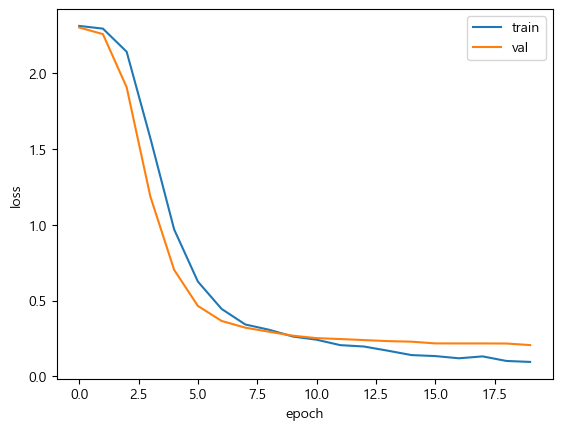

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [18]:
test_scaled = test_input/255
test_scaled = test_scaled.reshape(-1,28,28,1) # 전체층

In [19]:
model.evaluate(test_scaled,test_target)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9706 - loss: 0.1250


[0.18142208456993103, 0.9520958065986633]

In [20]:
val_scaled[0].reshape(28,28) #754 첫번째를 28*28로 나타냄

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

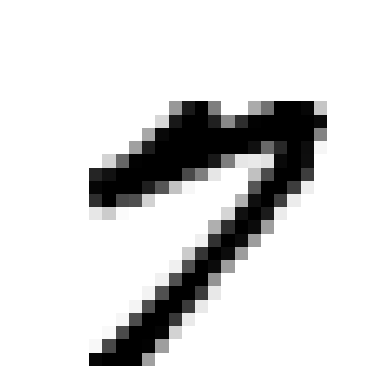

In [21]:
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.axis('off')
plt.show()

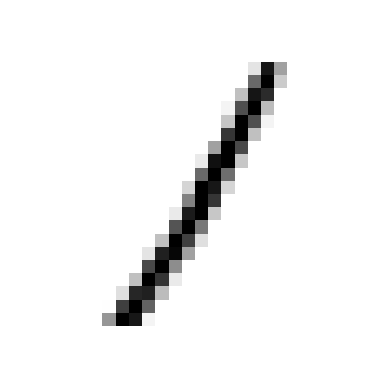

In [22]:
plt.imshow(val_scaled[1].reshape(28,28),cmap='gray_r')
plt.axis('off')
plt.show()